# Vamos ver como criar o gráfico do alpha de um ativo:
### 1- Alpha é quanto o ativo ultrapassa o seu benchmark
### 2- para criar essa comparação vamos precisar dos dados de um ativo, seu benchmark (o ativo ou indice ou fundo ao qual servirá de modelo) e a diferença proporcional(ou percentual) entre eles.

In [1]:
#Bibliotecas Necessárias:
import pandas_datareader as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Variáveis base para obter os dados da ação:

#ticker da empresa Apple retirado do yahoofinance:
ticker="AAPL"
ticker_do_benchmark="^GSPC"
#se deixar a data inicial em branco ele irá buscar a data mais antiga disponível
data_inicial = "20/01/2019"
#se deixar a data final em branco ele irá buscar a data mais recente disponível
data_final = "20/01/2020"

In [7]:
#Obtendo os dados da ação:
acao = web.DataReader(ticker, 'yahoo', start=data_inicial, end=data_final)
benchmark = web.DataReader(ticker_do_benchmark, 'yahoo', start=data_inicial, end=data_final)

In [10]:
#Vamos criar uma nova coluna chamada de retorno acumulado. Ela será igual a coluna de preço de fechamento ajustado para fins de praticidade.
acao['Retorno_acumulado']=acao['Adj Close']
benchmark['Retorno_acumulado']=benchmark['Adj Close']
x=0
while(x<len(acao['Retorno_acumulado'])):
    acao['Retorno_acumulado'][x]=((acao['Adj Close'][x]-acao['Adj Close'][0])/acao['Adj Close'][0])*100
    benchmark['Retorno_acumulado'][x]=((benchmark['Adj Close'][x]-benchmark['Adj Close'][0])/benchmark['Adj Close'][0])*100
    x+=1

ipykernel_launcher:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### -->Agora vamos criar o gráfico do retorno acumulado da ação e do seu benchmark em comparação:
### obs: a diferença entre os dois será o alpha.

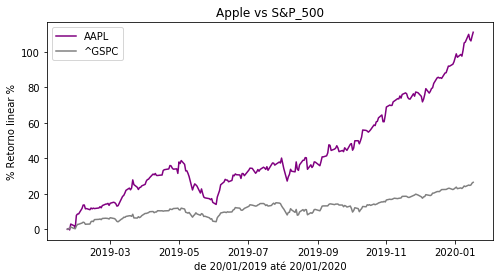

In [16]:
#Criando e customizando o gráfico da ação versus benchmark
plt.figure(figsize=(8,4))
plt.title("Apple vs S&P_500")
plt.xlabel("de " + data_inicial + " até " + data_final)
plt.ylabel("% Retorno linear %")
plt.plot(acao['Retorno_acumulado'], color='purple', label=str(ticker))
plt.plot(benchmark['Retorno_acumulado'], color='grey', label=str(ticker_do_benchmark))
plt.legend()

### -->Agora vamos criar o gráfico do alpha da ação:

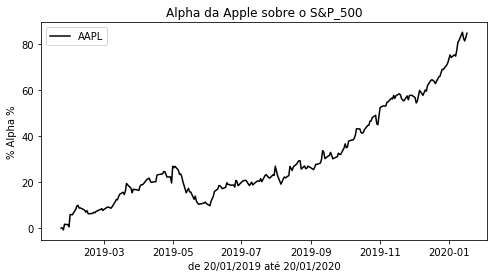

In [18]:
alpha=(acao['Retorno_acumulado']-benchmark['Retorno_acumulado'])

plt.figure(figsize=(8,4))
plt.title("Alpha da Apple sobre o S&P_500")
plt.xlabel("de " + data_inicial + " até " + data_final)
plt.ylabel("% Alpha %")
plt.plot(alpha, color='black', label=str(ticker))
plt.legend()

### Agora vamos colocar os três valores(Apple, S&P500 e alpha) em perpectiva no mesmo gráfico:

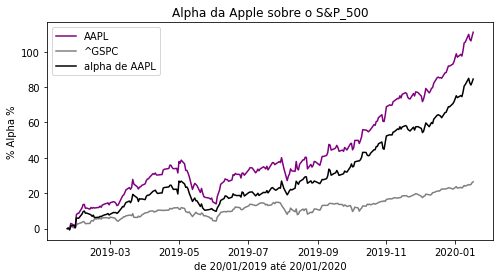

In [21]:
alpha=(acao['Retorno_acumulado']-benchmark['Retorno_acumulado'])

plt.figure(figsize=(8,4))
plt.title("Alpha da Apple sobre o S&P_500")
plt.xlabel("de " + data_inicial + " até " + data_final)
plt.ylabel("% Alpha %")
plt.plot(acao['Retorno_acumulado'], color='purple', label=str(ticker))
plt.plot(benchmark['Retorno_acumulado'], color='grey', label=str(ticker_do_benchmark))
plt.plot(alpha, color='black', label="alpha de " + str(ticker))
plt.legend()